Task 1B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv("student_data.csv")

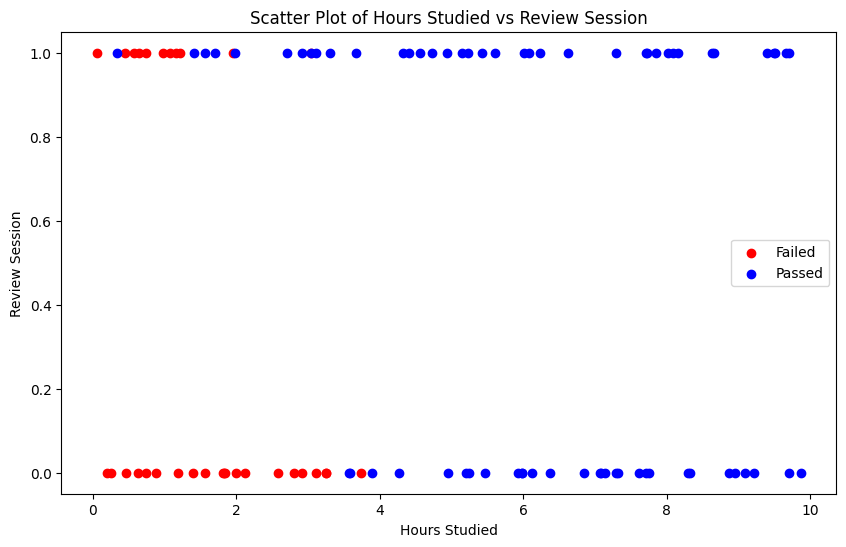

In [2]:
# 1. Create a visualization of the data
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Results'] == 0]['Hours_Studied'], data[data['Results'] == 0]['Review_Session'], color='red', label='Failed')
plt.scatter(data[data['Results'] == 1]['Hours_Studied'], data[data['Results'] == 1]['Review_Session'], color='blue', label='Passed')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter Plot of Hours Studied vs Review Session')
plt.legend()
plt.show()

In [5]:
# 2. Fit a logistic regression model
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-4.61373892]
Coefficients: [[1.36542016 1.87797591]]


In [6]:

# 3. Output performance metrics
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)

print("Accuracy:", accuracy)
print("AUC:", auc)

Accuracy: 0.93
AUC: 0.9761029411764706


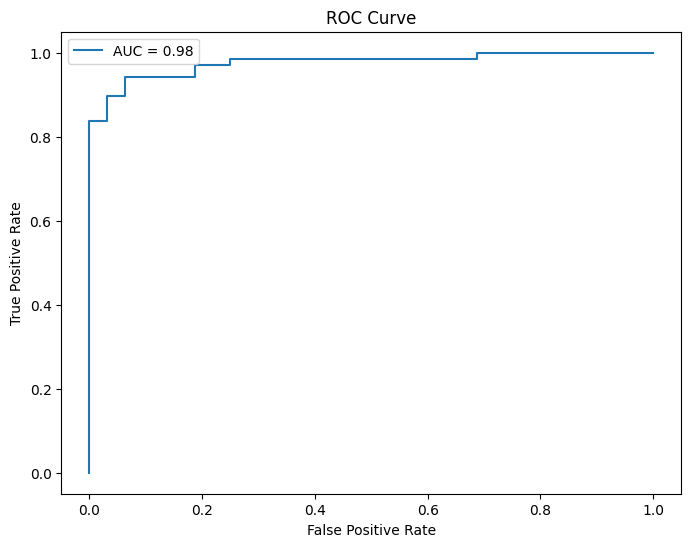

In [7]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Task 2

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 1. Fit SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# 2. Fit SVM with RBF kernel and grid search for gamma
param_grid = {'gamma': [0.1, 1, 10, 100]}
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X, y)

# Output the best gamma
print("Best gamma:", grid_search.best_params_['gamma'])

# Cross-validation scores for the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Best gamma: 0.1
Cross-validation scores: [0.95 0.95 1.   1.   1.  ]
Mean CV score: 0.9800000000000001
